In [3]:
%pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

# CONSTITUTION DE LA DONNEE

In [46]:
# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes
df_2020 = elections_2020[['county_fips', 'county_name', 'state_name']].rename(
    columns={'county_fips': 'fips', 'county_name': 'county_name', 'state_name': 'state_name'})

df_08_16 = elections_08_16[['fips_code', 'county']].rename(
    columns={'fips_code': 'fips', 'county': 'county_name'})

df_population = population[['FIPStxt', 'Area_Name', 'State']].rename(
    columns={'FIPStxt': 'fips', 'Area_Name': 'county_name', 'State': 'state_code'})

df_education = education[['FIPS Code', 'Area name', 'State']].rename(
    columns={'FIPS Code': 'fips', 'Area name': 'county_name', 'State': 'state_code'})

df_poverty = poverty[['FIPStxt', 'Area_name', 'Stabr']].rename(
    columns={'FIPStxt': 'fips', 'Area_name': 'county_name', 'Stabr': 'state_code'})

df_unemployment = unemployment[['fips_txt', 'area_name', 'Stabr']].rename(
    columns={'fips_txt': 'fips', 'area_name': 'county_name', 'Stabr': 'state_code'})

# Concat√©ner les donn√©es
all_data = pd.concat([
    df_2020,
    df_08_16,
    df_population,
    df_education,
    df_poverty,
    df_unemployment
], ignore_index=True)

# Harmoniser la colonne fips en 5 caract√®res
all_data['fips'] = all_data['fips'].astype(str).str.zfill(5)

# Supprimer les doublons
all_data_unique = all_data.drop_duplicates(subset=['fips']).sort_values(by='fips').reset_index(drop=True)

# V√©rifier les colonnes finales
print(all_data_unique.head())

# Sauvegarder dans un fichier Excel
all_data_unique.to_excel('datamap_0.xlsx', index=False)
print("\nDonn√©es harmonis√©es sauvegard√©es dans 'datamap_0.xlsx'.")


    fips     county_name state_name state_code
0  00000   United States        NaN         US
1  01000         Alabama        NaN         AL
2  01001  Autauga County    Alabama        NaN
3  01003  Baldwin County    Alabama        NaN
4  01005  Barbour County    Alabama        NaN

Donn√©es harmonis√©es sauvegard√©es dans 'datamap_0.xlsx'.


In [47]:
dm0 = pd.read_excel('datamap_0.xlsx')

# Liste des sources et leur priorit√©
sources = [df_2020, df_08_16, df_population, df_education, df_poverty, df_unemployment]

# Ajouter les colonnes manquantes dans harmonized_data
columns_to_fill = ['county_name', 'state_code', 'state_name']
for col in columns_to_fill:
    if col not in dm0.columns:
        dm0[col] = pd.NA

# Fonction pour combler les valeurs manquantes
def fill_missing_values(base_df, sources, columns_to_fill):
    for source in sources:
        for col in columns_to_fill:
            if col in source.columns:  # V√©rifier que la colonne existe dans la source
                base_df[col] = base_df[col].fillna(
                    base_df['fips'].map(source.set_index('fips')[col])  # Remplir selon la cl√© fips
                )
    return base_df

# Compl√©ter les colonnes manquantes
dm1_raw = fill_missing_values(dm0, sources, columns_to_fill)

# V√©rification des valeurs manquantes
missing_data = dm1_raw[columns_to_fill].isnull().sum()
print(f"Valeurs manquantes apr√®s remplissage :\n{missing_data}")

# Sauvegarder les donn√©es compl√®tes
dm1_raw.to_excel('datamap_1.xlsx', index=False)
print("\nDonn√©es compl√©t√©es sauvegard√©es dans 'datamap_1.xlsx'.")


Valeurs manquantes apr√®s remplissage :
county_name      0
state_code      41
state_name     172
dtype: int64

Donn√©es compl√©t√©es sauvegard√©es dans 'datamap_1.xlsx'.


In [48]:
import pandas as pd

# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes dans chaque dataset
df_2020 = elections_2020[['county_fips', 'county_name', 'state_name']].rename(
    columns={'county_fips': 'county_code', 'county_name': 'county_name', 'state_name': 'state_name'})

df_08_16 = elections_08_16[['fips_code', 'county']].rename(
    columns={'fips_code': 'county_code', 'county': 'county_name'})

df_population = population[['FIPStxt', 'Area_Name', 'State']].rename(
    columns={'FIPStxt': 'county_code', 'Area_Name': 'county_name', 'State': 'state_code'})

df_education = education[['FIPS Code', 'Area name', 'State']].rename(
    columns={'FIPS Code': 'county_code', 'Area name': 'county_name', 'State': 'state_code'})

df_poverty = poverty[['FIPStxt', 'Area_name', 'Stabr']].rename(
    columns={'FIPStxt': 'county_code', 'Area_name': 'county_name', 'Stabr': 'state_code'})

df_unemployment = unemployment[['fips_txt', 'area_name', 'Stabr']].rename(
    columns={'fips_txt': 'county_code', 'area_name': 'county_name', 'Stabr': 'state_code'})

# Liste des sources et leur priorit√©
sources = [df_2020, df_08_16, df_population, df_education, df_poverty, df_unemployment]

# Charger le fichier harmonis√© existant ou cr√©er une base vide
dm1 = pd.read_excel('datamap_1.xlsx')

# Renommer la colonne principale en `county_code`
dm1.rename(columns={'fips': 'county_code'}, inplace=True)

# S'assurer que `county_code` est format√© sur 5 chiffres
dm1['county_code'] = dm1['county_code'].astype(str).str.zfill(5)

# Ajouter les colonnes manquantes
columns_to_fill = ['county_name', 'state_code', 'state_name']
for col in columns_to_fill:
    if col not in dm1.columns:
        dm1[col] = pd.NA

# Fonction pour combler les valeurs manquantes
def fill_missing_values(base_df, sources, columns_to_fill):
    for source in sources:
        # S'assurer que county_code est au bon format dans les sources
        source['county_code'] = source['county_code'].astype(str).str.zfill(5)
        for col in columns_to_fill:
            if col in source.columns:  # V√©rifier que la colonne existe dans la source
                base_df[col] = base_df[col].fillna(
                    base_df['county_code'].map(source.set_index('county_code')[col])  # Remplir selon la cl√© county_code
                )
    return base_df

# Compl√©ter les colonnes manquantes
dm2raw = fill_missing_values(dm1, sources, columns_to_fill)

# V√©rification des valeurs manquantes
missing_data = dm2raw[columns_to_fill].isnull().sum()
print(f"Valeurs manquantes apr√®s remplissage :\n{missing_data}")

# Sauvegarder les donn√©es compl√®tes
dm2raw.to_excel('datamap_2.xlsx', index=False)
print("\nDonn√©es compl√©t√©es sauvegard√©es dans 'datamap_2.xlsx'.")


Valeurs manquantes apr√®s remplissage :
county_name      0
state_code      41
state_name     172
dtype: int64

Donn√©es compl√©t√©es sauvegard√©es dans 'datamap_2.xlsx'.


In [49]:
import pandas as pd

# Charger les datasets
elections_2020 = pd.read_csv('./data/2020_US_County_Level_Presidential_Results.csv')
elections_08_16 = pd.read_csv('./data/US_County_Level_Presidential_Results_08-16.csv')
population = pd.read_excel('./data/PopulationEstimates.xls', engine='xlrd', header=2)
education = pd.read_excel('./data/Education.xls', engine='xlrd', header=4)
poverty = pd.read_excel('./data/PovertyEstimates.xls', engine='xlrd', header=4)
unemployment = pd.read_excel('./data/Unemployment.xls', engine='xlrd', header=4)

# Harmoniser les colonnes pertinentes dans chaque fichier
elections_2020 = elections_2020[['county_fips', 'per_gop', 'per_dem']].rename(columns={'county_fips': 'county_code'})
elections_08_16 = elections_08_16[['fips_code', 'total_2016', 'dem_2016', 'gop_2016']].rename(columns={'fips_code': 'county_code'})
population = population[['FIPStxt', 'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2013']].rename(
    columns={'FIPStxt': 'county_code', 'Rural-urban_Continuum Code_2013': 'rural_urban_code',
             'Urban_Influence_Code_2013': 'urban_influence_code'})
education = education[['FIPS Code', 'Percent of adults with less than a high school diploma, 2015-19',
                       'Percent of adults with a high school diploma only, 2015-19',
                       'Percent of adults completing some college or associate\'s degree, 2015-19',
                       'Percent of adults with a bachelor\'s degree or higher, 2015-19']].rename(
    columns={'FIPS Code': 'county_code',
             'Percent of adults with less than a high school diploma, 2015-19': 'percent_no_highschool',
             'Percent of adults with a high school diploma only, 2015-19': 'percent_highschool',
             'Percent of adults completing some college or associate\'s degree, 2015-19': 'percent_college',
             'Percent of adults with a bachelor\'s degree or higher, 2015-19': 'percent_bachelor'})
poverty = poverty[['FIPStxt', 'PCTPOVALL_2019', 'MEDHHINC_2019']].rename(
    columns={'FIPStxt': 'county_code', 'PCTPOVALL_2019': 'percent_poverty',
             'MEDHHINC_2019': 'median_household_income'})
unemployment = unemployment[['fips_txt', 'Unemployment_rate_2019', 'Employed_2019', 'Unemployed_2019']].rename(
    columns={'fips_txt': 'county_code', 'Unemployment_rate_2019': 'unemployment_rate'})

# Standardiser le format des `county_code` (5 caract√®res)
datasets = [elections_2020, elections_08_16, population, education, poverty, unemployment]
for df in datasets:
    df['county_code'] = df['county_code'].astype(str).str.zfill(5)

# Charger le fichier datamap_2.xlsx
datamap = pd.read_excel('datamap_2.xlsx')
datamap['county_code'] = datamap['county_code'].astype(str).str.zfill(5)


# Liste des colonnes pertinentes √† ajouter
columns_to_add = {
    'elections_2020': ['per_gop', 'per_dem'],
    'elections_08_16': ['total_2016', 'dem_2016', 'gop_2016'],
    'population': ['rural_urban_code', 'urban_influence_code'],
    'education': ['percent_no_highschool', 'percent_highschool', 'percent_college', 'percent_bachelor'],
    'poverty': ['percent_poverty', 'median_household_income'],
    'unemployment': ['unemployment_rate', 'Employed_2019', 'Unemployed_2019']
}

# Compl√©ter les colonnes manquantes dans le fichier datamap
for source, cols in zip(datasets, columns_to_add.values()):
    for col in cols:
        if col not in datamap.columns:
            datamap[col] = pd.NA
        datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))

# Sauvegarder le fichier enrichi
datamap.to_excel('datamap_3.xlsx', index=False)
print("\nFichier 'datamap_3.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.")


/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))
/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datamap[col] = datamap[col].fillna(datamap['county_code'].map(source.set_index('county_code')[col]))
/tmp/ipykernel_13486/4166387504.py:57: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_object


Fichier 'datamap_3.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.


In [50]:
# V√©rifier les valeurs manquantes
missing_data = datamap.isnull().sum()
print("Valeurs manquantes par colonne :\n", missing_data)

# Pourcentage de valeurs manquantes
missing_percentage = (missing_data / len(datamap)) * 100
print("\nPourcentage de valeurs manquantes par colonne :\n", missing_percentage)

# V√©rifier les doublons
duplicate_count = datamap.duplicated().sum()
print(f"Nombre de doublons dans le DataFrame : {duplicate_count}")

# Statistiques descriptives
stats = datamap.describe()
print("Statistiques descriptives :\n", stats)


Valeurs manquantes par colonne :
 county_code                  0
county_name                  0
state_name                 172
state_code                  41
per_gop                    172
per_dem                    172
total_2016                 212
dem_2016                   212
gop_2016                   212
rural_urban_code           104
urban_influence_code       104
percent_no_highschool       51
percent_highschool          51
percent_college             51
percent_bachelor            51
percent_poverty            131
median_household_income    131
unemployment_rate           52
Employed_2019               52
Unemployed_2019             52
dtype: int64

Pourcentage de valeurs manquantes par colonne :
 county_code                0.000000
county_name                0.000000
state_name                 5.174489
state_code                 1.233454
per_gop                    5.174489
per_dem                    5.174489
total_2016                 6.377858
dem_2016                   6.37

### REMARQUE

Ici on remarque que les donn√©es qui manques pour `per_gop`, `per_dem`, `total_2016`, `dem_2016`, `gop_2016`, `rural_urban_code`, `urban_influence_code` les zone regionales.

par exemple Alasca (02000) a ses county 02*** 
            Alabama (01000) a ses county 01***

In [51]:
datamap['is_state'] = datamap['county_code'].apply(lambda x: 1 if x.endswith('000') else 0)
datamap_complete = datamap.copy()
print(datamap_complete.head())

# Sauvegarder le fichier enrichi
datamap.to_excel('datamap_4.xlsx', index=False)
print("\nFichier 'datamap_4.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.")

  county_code     county_name state_name state_code   per_gop   per_dem  \
0       00000   United States        NaN         US       NaN       NaN   
1       01000         Alabama        NaN         AL       NaN       NaN   
2       01001  Autauga County    Alabama         AL  0.714368  0.270184   
3       01003  Baldwin County    Alabama         AL  0.761714  0.224090   
4       01005  Barbour County    Alabama         AL  0.534512  0.457882   

   total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
0         NaN       NaN       NaN               NaN  ...   
1         NaN       NaN       NaN               NaN  ...   
2     24661.0    5908.0   18110.0               2.0  ...   
3     94090.0   18409.0   72780.0               3.0  ...   
4     10390.0    4848.0    5431.0               6.0  ...   

   percent_no_highschool  percent_highschool  percent_college  \
0              11.998918           26.956844        28.898697   
1              13.819302           30.800268        29.912


Fichier 'datamap_4.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.


In [52]:
# Filtrer uniquement les comt√©s (is_state == 0)
datamap_counties = datamap[datamap['is_state'] == 0].copy()

# V√©rification
print(f"Nombre total d'observations : {len(datamap)}")
print(f"Nombre de comt√©s : {len(datamap_counties)}")
print(datamap_counties.head())

# Sauvegarder le fichier enrichi
datamap_counties.to_excel('counties.xlsx', index=False)
print("\nFichier 'counties.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.")


Nombre total d'observations : 3324
Nombre de comt√©s : 3271
  county_code     county_name state_name state_code   per_gop   per_dem  \
2       01001  Autauga County    Alabama         AL  0.714368  0.270184   
3       01003  Baldwin County    Alabama         AL  0.761714  0.224090   
4       01005  Barbour County    Alabama         AL  0.534512  0.457882   
5       01007     Bibb County    Alabama         AL  0.784263  0.206983   
6       01009   Blount County    Alabama         AL  0.895716  0.095694   

   total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
2     24661.0    5908.0   18110.0               2.0  ...   
3     94090.0   18409.0   72780.0               3.0  ...   
4     10390.0    4848.0    5431.0               6.0  ...   
5      8748.0    1874.0    6733.0               1.0  ...   
6     25384.0    2150.0   22808.0               1.0  ...   

   percent_no_highschool  percent_highschool  percent_college  \
2              11.483395           33.588459        28.356571  

In [53]:
# Identifier les valeurs manquantes par colonne
missing_data = datamap_counties.isnull().sum()
missing_percentage = (missing_data / len(datamap_counties)) * 100
print("Valeurs manquantes par colonne :\n", missing_data)
print("\nPourcentage de valeurs manquantes par colonne :\n", missing_percentage)

Valeurs manquantes par colonne :
 county_code                  0
county_name                  0
state_name                 119
state_code                  41
per_gop                    119
per_dem                    119
total_2016                 159
dem_2016                   159
gop_2016                   159
rural_urban_code            51
urban_influence_code        51
percent_no_highschool       51
percent_highschool          51
percent_college             51
percent_bachelor            51
percent_poverty            130
median_household_income    130
unemployment_rate           52
Employed_2019               52
Unemployed_2019             52
is_state                     0
dtype: int64

Pourcentage de valeurs manquantes par colonne :
 county_code                0.000000
county_name                0.000000
state_name                 3.638031
state_code                 1.253439
per_gop                    3.638031
per_dem                    3.638031
total_2016                 4.860899


In [54]:
# Identifier les lignes o√π 'county_name' contient "Puerto Rico"
puerto_rico_rows = datamap_counties['county_name'].str.contains("Puerto Rico", na=False)

# Remplir 'state_name' avec "Puerto Rico"
datamap_counties.loc[puerto_rico_rows, 'state_name'] = "Puerto Rico"

# Nettoyer 'county_name' en retirant "Puerto Rico"
datamap_counties.loc[puerto_rico_rows, 'county_name'] = datamap_counties.loc[puerto_rico_rows, 'county_name'].str.replace(", Puerto Rico", "", regex=False)

# V√©rification
print(datamap_counties[puerto_rico_rows].head())


     county_code             county_name   state_name state_code  per_gop  \
3246       72001      Adjuntas Municipio  Puerto Rico         PR      NaN   
3247       72003        Aguada Municipio  Puerto Rico         PR      NaN   
3248       72005     Aguadilla Municipio  Puerto Rico         PR      NaN   
3249       72007  Aguas Buenas Municipio  Puerto Rico         PR      NaN   
3250       72009      Aibonito Municipio  Puerto Rico         PR      NaN   

      per_dem  total_2016  dem_2016  gop_2016  rural_urban_code  ...  \
3246      NaN         NaN       NaN       NaN               6.0  ...   
3247      NaN         NaN       NaN       NaN               2.0  ...   
3248      NaN         NaN       NaN       NaN               2.0  ...   
3249      NaN         NaN       NaN       NaN               1.0  ...   
3250      NaN         NaN       NaN       NaN               1.0  ...   

      percent_no_highschool  percent_highschool  percent_college  \
3246              34.680054         

In [55]:
# Dictionnaire associant les state_code aux state_name
state_mapping = {
    "AK": "Alaska",
}

# Corriger 'state_name' en utilisant 'state_code'
datamap_counties['state_name'] = datamap_counties.apply(
    lambda row: state_mapping[row['state_code']] if pd.notnull(row['state_code']) and row['state_code'] in state_mapping else row['state_name'], axis=1
)

# Corriger 'state_code' en utilisant 'state_name'
datamap_counties['state_code'] = datamap_counties.apply(
    lambda row: {v: k for k, v in state_mapping.items()}.get(row['state_name'], row['state_code']), axis=1
)

# V√©rification
print(datamap_counties[['state_code', 'state_name']].drop_duplicates().head())


    state_code  state_name
2           AL     Alabama
70          AK      Alaska
147         AZ     Arizona
163         AR    Arkansas
239         CA  California


In [56]:
# Sauvegarder le fichier enrichi
datamap_counties.to_excel('counties_cleaned.xlsx', index=False)
print("\nFichier 'counties_cleaned.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.")


Fichier 'counties_cleaned.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.


In [57]:
import pandas as pd

# Charger le fichier nettoy√© pour analyse
file_path = "counties_cleaned.xlsx"
data = pd.read_excel(file_path)

# Identifier les valeurs manquantes par colonne
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Pr√©parer un DataFrame pour visualiser les colonnes avec valeurs manquantes
missing_summary = pd.DataFrame({
    "Colonne": missing_data.index,
    "Valeurs Manquantes": missing_data.values,
    "Pourcentage (%)": missing_percentage.values
})

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_summary = missing_summary[missing_summary["Valeurs Manquantes"] > 0]
print(missing_summary)
#import ace_tools as tools; tools.display_dataframe_to_user(name="R√©sum√© des colonnes avec des valeurs manquantes", dataframe=missing_summary)


                    Colonne  Valeurs Manquantes  Pourcentage (%)
2                state_name                   5         0.152858
3                state_code                   1         0.030572
4                   per_gop                 119         3.638031
5                   per_dem                 119         3.638031
6                total_2016                 159         4.860899
7                  dem_2016                 159         4.860899
8                  gop_2016                 159         4.860899
9          rural_urban_code                  51         1.559156
10     urban_influence_code                  51         1.559156
11    percent_no_highschool                  51         1.559156
12       percent_highschool                  51         1.559156
13          percent_college                  51         1.559156
14         percent_bachelor                  51         1.559156
15          percent_poverty                 130         3.974320
16  median_household_inco

In [58]:
# Colonnes socio-d√©mographiques √† imputer
columns_to_fill_mean = ['percent_poverty', 'median_household_income', 'unemployment_rate',
                        'percent_no_highschool', 'percent_highschool', 'percent_college', 'percent_bachelor']

# Remplir les valeurs manquantes par la moyenne
for col in columns_to_fill_mean:
    data[col].fillna(data[col].mean(), inplace=True)

# V√©rification apr√®s imputation
missing_data_after = data.isnull().sum()
print("Valeurs manquantes apr√®s imputation :\n", missing_data_after)


Valeurs manquantes apr√®s imputation :
 county_code                  0
county_name                  0
state_name                   5
state_code                   1
per_gop                    119
per_dem                    119
total_2016                 159
dem_2016                   159
gop_2016                   159
rural_urban_code            51
urban_influence_code        51
percent_no_highschool        0
percent_highschool           0
percent_college              0
percent_bachelor             0
percent_poverty              0
median_household_income      0
unemployment_rate            0
Employed_2019               52
Unemployed_2019             52
is_state                     0
dtype: int64


/tmp/ipykernel_13486/895207558.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [59]:
# Colonnes √† exclure
#columns_to_exclude = ['per_gop', 'per_dem', 'total_2016', 'dem_2016', 'gop_2016']
columns_to_exclude = ['total_2016', 'dem_2016', 'gop_2016']

# Cr√©er un DataFrame sp√©cifique √† la mod√©lisation
data_for_model = data.drop(columns=columns_to_exclude)

# V√©rification des dimensions
print(f"Dimensions du DataFrame original : {data.shape}")
print(f"Dimensions du DataFrame pour la mod√©lisation : {data_for_model.shape}")

# Sauvegarder le fichier enrichi
data_for_model.to_excel('data_for_model.xlsx', index=False)
print("\nFichier 'data_for_model.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.")


Dimensions du DataFrame original : (3271, 21)
Dimensions du DataFrame pour la mod√©lisation : (3271, 18)

Fichier 'data_for_model.xlsx' sauvegard√© avec toutes les donn√©es int√©gr√©es.


In [60]:
# Identifier les lignes o√π state_name ou state_code est manquant
missing_states = data_for_model[data_for_model['state_name'].isnull() | data_for_model['state_code'].isnull()]

# Afficher les lignes avec des valeurs manquantes
print("Lignes avec des valeurs manquantes pour state_name ou state_code :")
print(missing_states[['state_name', 'state_code', 'county_name']])


Lignes avec des valeurs manquantes pour state_name ou state_code :
     state_name state_code                county_name
595         NaN         HI             Kalawao County
1701        NaN         MT  Yellowstone National Park
2466        NaN        NaN             Shannon County
2965        NaN         VA               Bedford city
2970        NaN         VA         Clifton Forge city


In [61]:
missing_data = data_for_model.isnull().sum()
missing_percentage = (missing_data / len(data_for_model)) * 100

# R√©sumer les colonnes avec des valeurs manquantes
missing_summary = pd.DataFrame({
    "Colonne": missing_data.index,
    "Valeurs Manquantes": missing_data.values,
    "Pourcentage (%)": missing_percentage.values
})
missing_summary = missing_summary[missing_summary["Valeurs Manquantes"] > 0]

print("R√©sum√© des valeurs manquantes :")
print(missing_summary)

R√©sum√© des valeurs manquantes :
                 Colonne  Valeurs Manquantes  Pourcentage (%)
2             state_name                   5         0.152858
3             state_code                   1         0.030572
4                per_gop                 119         3.638031
5                per_dem                 119         3.638031
6       rural_urban_code                  51         1.559156
7   urban_influence_code                  51         1.559156
15         Employed_2019                  52         1.589728
16       Unemployed_2019                  52         1.589728


In [21]:
"""
# Corriger state_name et state_code
state_mapping = {
    "AL": "Alabama",
    "AK": "Alaska",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "FL": "Florida",
    "GA": "Georgia",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PA": "Pennsylvania",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming",
    "DC": "District of Columbia",
    "PR": "Puerto Rico",
}


# Compl√©ter state_name √† partir de state_code
data_for_model['state_name'] = data_for_model.apply(
    lambda row: state_mapping.get(row['state_code'], row['state_name']), axis=1
)

# Compl√©ter state_code √† partir de state_name
data_for_model['state_code'] = data_for_model.apply(
    lambda row: {v: k for k, v in state_mapping.items()}.get(row['state_name'], row['state_code']), axis=1
)

# Corriger rural_urban_code et urban_influence_code avec la moyenne
data_for_model['rural_urban_code'].fillna(data_for_model['rural_urban_code'].mean(), inplace=True)
data_for_model['urban_influence_code'].fillna(data_for_model['urban_influence_code'].mean(), inplace=True)

# Corriger Employed_2019 et Unemployed_2019 avec la m√©diane
data_for_model['Employed_2019'].fillna(data_for_model['Employed_2019'].median(), inplace=True)
data_for_model['Unemployed_2019'].fillna(data_for_model['Unemployed_2019'].median(), inplace=True)

# V√©rification finale des valeurs manquantes
missing_data_final = data_for_model.isnull().sum()
print("Valeurs manquantes apr√®s correction :\n", missing_data_final)
"""


'\n# Corriger state_name et state_code\nstate_mapping = {\n    "AL": "Alabama",\n    "AK": "Alaska",\n    "AZ": "Arizona",\n    "AR": "Arkansas",\n    "CA": "California",\n    "CO": "Colorado",\n    "CT": "Connecticut",\n    "DE": "Delaware",\n    "FL": "Florida",\n    "GA": "Georgia",\n    "HI": "Hawaii",\n    "ID": "Idaho",\n    "IL": "Illinois",\n    "IN": "Indiana",\n    "IA": "Iowa",\n    "KS": "Kansas",\n    "KY": "Kentucky",\n    "LA": "Louisiana",\n    "ME": "Maine",\n    "MD": "Maryland",\n    "MA": "Massachusetts",\n    "MI": "Michigan",\n    "MN": "Minnesota",\n    "MS": "Mississippi",\n    "MO": "Missouri",\n    "MT": "Montana",\n    "NE": "Nebraska",\n    "NV": "Nevada",\n    "NH": "New Hampshire",\n    "NJ": "New Jersey",\n    "NM": "New Mexico",\n    "NY": "New York",\n    "NC": "North Carolina",\n    "ND": "North Dakota",\n    "OH": "Ohio",\n    "OK": "Oklahoma",\n    "OR": "Oregon",\n    "PA": "Pennsylvania",\n    "RI": "Rhode Island",\n    "SC": "South Carolina",\n   

In [62]:
# Extraire les √©tats (is_state == 1) et corriger les colonnes
states_data = datamap_complete[datamap_complete['is_state'] == 1][['county_code', 'county_name', 'state_code']]

# Renommer county_name en state_name pour les √©tats
states_data.rename(columns={'county_name': 'state_name'}, inplace=True)

# Cr√©er un dictionnaire reliant le pr√©fixe de county_code (state code) aux informations d'√©tat
state_info = states_data.set_index('county_code').to_dict(orient='index')

# V√©rification
print("Dictionnaire des √©tats :")
print(state_info)

# Fonction pour retrouver le state_name et state_code √† partir du county_code
def fill_state_info(row):
    if pd.isnull(row['state_name']) or pd.isnull(row['state_code']):
        # Obtenir le pr√©fixe de l'√©tat √† partir du county_code
        state_prefix = str(row['county_code'])[:2] + "000"
        # R√©cup√©rer les informations de l'√©tat
        state_data = state_info.get(state_prefix, {})
        # Compl√©ter les valeurs manquantes
        row['state_name'] = state_data.get('state_name', row['state_name'])
        row['state_code'] = state_data.get('state_code', row['state_code'])
    return row

# Appliquer la fonction sur tout le DataFrame
data_for_model = data_for_model.apply(fill_state_info, axis=1)



Dictionnaire des √©tats :
{'00000': {'state_name': 'United States', 'state_code': 'US'}, '01000': {'state_name': 'Alabama', 'state_code': 'AL'}, '02000': {'state_name': 'Alaska', 'state_code': 'AK'}, '04000': {'state_name': 'Arizona', 'state_code': 'AZ'}, '05000': {'state_name': 'Arkansas', 'state_code': 'AR'}, '06000': {'state_name': 'California', 'state_code': 'CA'}, '08000': {'state_name': 'Colorado', 'state_code': 'CO'}, '09000': {'state_name': 'Connecticut', 'state_code': 'CT'}, '10000': {'state_name': 'Delaware', 'state_code': 'DE'}, '11000': {'state_name': 'District of Columbia', 'state_code': 'DC'}, '12000': {'state_name': 'Florida', 'state_code': 'FL'}, '13000': {'state_name': 'Georgia', 'state_code': 'GA'}, '15000': {'state_name': 'Hawaii', 'state_code': 'HI'}, '16000': {'state_name': 'Idaho', 'state_code': 'ID'}, '17000': {'state_name': 'Illinois', 'state_code': 'IL'}, '18000': {'state_name': 'Indiana', 'state_code': 'IN'}, '19000': {'state_name': 'Iowa', 'state_code': 'IA'}

In [63]:
# V√©rifier les valeurs manquantes apr√®s correction
missing_states_final = data_for_model[data_for_model['state_name'].isnull() | data_for_model['state_code'].isnull()]
print("Lignes restantes avec des valeurs manquantes pour state_name ou state_code :")
print(missing_states_final[['county_code', 'state_name', 'state_code', 'county_name']])

# Profiter et ajouter le lead 0 au code de d√©partement
data_for_model['county_code'] = data_for_model['county_code'].astype(str).str.zfill(5)


# Sauvegarder le fichier corrig√©
data_for_model.to_excel("data_for_model_filled.xlsx", index=False)
print("Le fichier corrig√© a √©t√© sauvegard√© sous 'data_for_model_filled.xlsx'.")

Lignes restantes avec des valeurs manquantes pour state_name ou state_code :
Empty DataFrame
Columns: [county_code, state_name, state_code, county_name]
Index: []
Le fichier corrig√© a √©t√© sauvegard√© sous 'data_for_model_filled.xlsx'.


In [64]:
# V√©rifier les valeurs manquantes
missing_summary = data_for_model.isnull().sum()
print("Valeurs manquantes :\n", missing_summary[missing_summary > 0])

# V√©rifier les doublons
duplicate_count = data_for_model.duplicated().sum()
print(f"Nombre de doublons : {duplicate_count}")

# V√©rifier les types de colonnes
print("Types de colonnes :\n", data_for_model.dtypes)


Valeurs manquantes :
 per_gop                 119
per_dem                 119
rural_urban_code         51
urban_influence_code     51
Employed_2019            52
Unemployed_2019          52
dtype: int64
Nombre de doublons : 0
Types de colonnes :
 county_code                 object
county_name                 object
state_name                  object
state_code                  object
per_gop                    float64
per_dem                    float64
rural_urban_code           float64
urban_influence_code       float64
percent_no_highschool      float64
percent_highschool         float64
percent_college            float64
percent_bachelor           float64
percent_poverty            float64
median_household_income    float64
unemployment_rate          float64
Employed_2019              float64
Unemployed_2019            float64
is_state                     int64
dtype: object


Approche pour remplir les champs manquants
`rural_urban_code` et `urban_influence_code` :

Ce sont des classifications g√©ographiques.
On peut les remplir par la moyenne de l'√©tat pour conserver une coh√©rence r√©gionale.
Employed_2019 et Unemployed_2019 :

Ces donn√©es sont des chiffres absolus.
Les remplir par la m√©diane de l'√©tat ou la m√©diane globale serait judicieux pour √©viter de biaiser les moyennes des distributions.

In [66]:
# Imputer les valeurs manquantes de rural_urban_code et urban_influence_code par la moyenne de l'√©tat
for col in ['rural_urban_code', 'urban_influence_code']:
    data_for_model[col] = data_for_model.groupby('state_code')[col].transform(
        lambda x: x.fillna(x.mean())
    )

# V√©rifier les valeurs manquantes restantes pour ces colonnes
missing_geo = data_for_model[['rural_urban_code', 'urban_influence_code']].isnull().sum()
print("Valeurs manquantes pour les colonnes g√©ographiques apr√®s imputation par √©tat :\n", missing_geo)

# Imputer les valeurs manquantes d'Employed_2019 et Unemployed_2019 par la m√©diane de l'√©tat
for col in ['Employed_2019', 'Unemployed_2019']:
    data_for_model[col] = data_for_model.groupby('state_code')[col].transform(
        lambda x: x.fillna(x.median())
    )

# V√©rifier les valeurs manquantes restantes pour ces colonnes
missing_employment = data_for_model[['Employed_2019', 'Unemployed_2019']].isnull().sum()
print("Valeurs manquantes pour les colonnes d'emploi apr√®s imputation par √©tat :\n", missing_employment)

# V√©rification finale des valeurs manquantes dans tout le DataFrame
missing_summary = data_for_model.isnull().sum()
print("Valeurs manquantes restantes dans le DataFrame :\n", missing_summary[missing_summary > 0])


Valeurs manquantes pour les colonnes g√©ographiques apr√®s imputation par √©tat :
 rural_urban_code        0
urban_influence_code    0
dtype: int64
Valeurs manquantes pour les colonnes d'emploi apr√®s imputation par √©tat :
 Employed_2019      0
Unemployed_2019    0
dtype: int64
Valeurs manquantes restantes dans le DataFrame :
 per_gop    119
per_dem    119
dtype: int64


In [11]:
data_for_model.to_excel("data_for_model_filled2.xlsx", index=False)
print("Le fichier corrig√© a √©t√© sauvegard√© sous 'data_for_model_filled2.xlsx'.")

Le fichier corrig√© a √©t√© sauvegard√© sous 'data_for_model_filled2.xlsx'.


In [2]:
data_for_model = pd.read_excel("data_for_model_filled2.xlsx")

In [3]:
df = data_for_model
df.head()

county_code     county_name state_name state_code   per_gop   per_dem  \
0         1001  Autauga County    Alabama         AL  0.714368  0.270184   
1         1003  Baldwin County    Alabama         AL  0.761714  0.224090   
2         1005  Barbour County    Alabama         AL  0.534512  0.457882   
3         1007     Bibb County    Alabama         AL  0.784263  0.206983   
4         1009   Blount County    Alabama         AL  0.895716  0.095694   

   rural_urban_code  urban_influence_code  percent_no_highschool  \
0               2.0                   2.0              11.483395   
1               3.0                   2.0               9.193843   
2               6.0                   6.0              26.786907   
3               1.0                   1.0              20.942602   
4               1.0                   1.0              19.509438   

   percent_highschool  percent_college  percent_bachelor  percent_poverty  \
0           33.588459        28.356571         26.571573             12.1   
1           27.659616        31.284081         31.862459             10.1   
2           35.604542        26.029837         11.578713             27.1   
3           44.878773        23.800098         10.378526             20.3   
4           33.422131        33.975021         13.093413             16.3   

   median_household_income  unemployment_rate  Employed_2019  Unemployed_2019  \
0                  58233.0                2.7        25458.0            714.0   
1                  59871.0                2.7        94675.0           2653.0   
2                  35972.0                3.8         8213.0            324.0   
3                  47918.0                3.1         8419.0            266.0   
4                  52902.0                2.7        24655.0            676.0   

   is_state  
0         0  
1         0  
2         0  
3         0  
4         0

In [70]:
df.shape


(3271, 18)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   county_code              3271 non-null   int64  
 1   county_name              3271 non-null   object 
 2   state_name               3271 non-null   object 
 3   state_code               3271 non-null   object 
 4   per_gop                  3152 non-null   float64
 5   per_dem                  3152 non-null   float64
 6   rural_urban_code         3271 non-null   float64
 7   urban_influence_code     3271 non-null   float64
 8   percent_no_highschool    3271 non-null   float64
 9   percent_highschool       3271 non-null   float64
 10  percent_college          3271 non-null   float64
 11  percent_bachelor         3271 non-null   float64
 12  percent_poverty          3271 non-null   float64
 13  median_household_income  3271 non-null   float64
 14  unemployment_rate       

In [4]:
print("before dropna")
df.shape
df_cleaned = df.dropna(subset=["per_gop", "per_dem"])
print("after dropna")
df_cleaned.shape


before dropna
after dropna


(3152, 18)

In [24]:
df_cleaned.describe()

county_code      per_gop      per_dem  rural_urban_code  \
count   3152.000000  3152.000000  3152.000000       3152.000000   
mean   30299.778236     0.647805     0.333851          5.018226   
std    15209.461517     0.162014     0.159852          2.700805   
min     1001.000000     0.053973     0.030909          1.000000   
25%    18162.500000     0.554128     0.209978          2.000000   
50%    29166.000000     0.681720     0.300235          6.000000   
75%    45075.500000     0.773776     0.425830          7.000000   
max    56045.000000     0.961818     0.921497          9.000000   

       urban_influence_code  percent_no_highschool  percent_highschool  \
count           3152.000000            3152.000000         3152.000000   
mean               5.285336              13.088745           34.146571   
std                3.492623               6.226135            7.180057   
min                1.000000               1.116910            7.265136   
25%                2.000000               8.529196           29.774559   
50%                5.000000              11.840097           34.436995   
75%                8.000000              16.618657           39.041713   
max               12.000000              73.560211           57.433674   

       percent_college  percent_bachelor  percent_poverty  \
count      3152.000000       3152.000000      3152.000000   
mean         30.800440         21.964244        14.470467   
std           5.178784          9.521221         5.757004   
min           5.235602          0.000000         2.700000   
25%          27.325159         15.388462        10.500000   
50%          30.699049         19.667345        13.500000   
75%          34.179402         25.773898        17.400000   
max          60.563381         77.557411        47.700000   

       median_household_income  unemployment_rate  Employed_2019  \
count              3152.000000        3152.000000   3.152000e+03   
mean              55604.059138           3.963283   4.977511e+04   
std               14359.703900           1.381594   1.629790e+05   
min               24732.000000           0.700000   2.120000e+02   
25%               46278.000000           3.000000   4.602750e+03   
50%               53408.000000           3.700000   1.104650e+04   
75%               61717.250000           4.600000   3.041400e+04   
max              151806.000000          18.300000   4.894296e+06   

       Unemployed_2019  is_state       target  
count      3152.000000    3152.0  3152.000000  
mean       1895.157995       0.0     0.823287  
std        6537.333112       0.0     0.381486  
min           4.000000       0.0     0.000000  
25%         199.000000       0.0     1.000000  
50%         455.000000       0.0     1.000000  
75%        1219.250000       0.0     1.000000  
max      227288.000000       0.0     1.000000

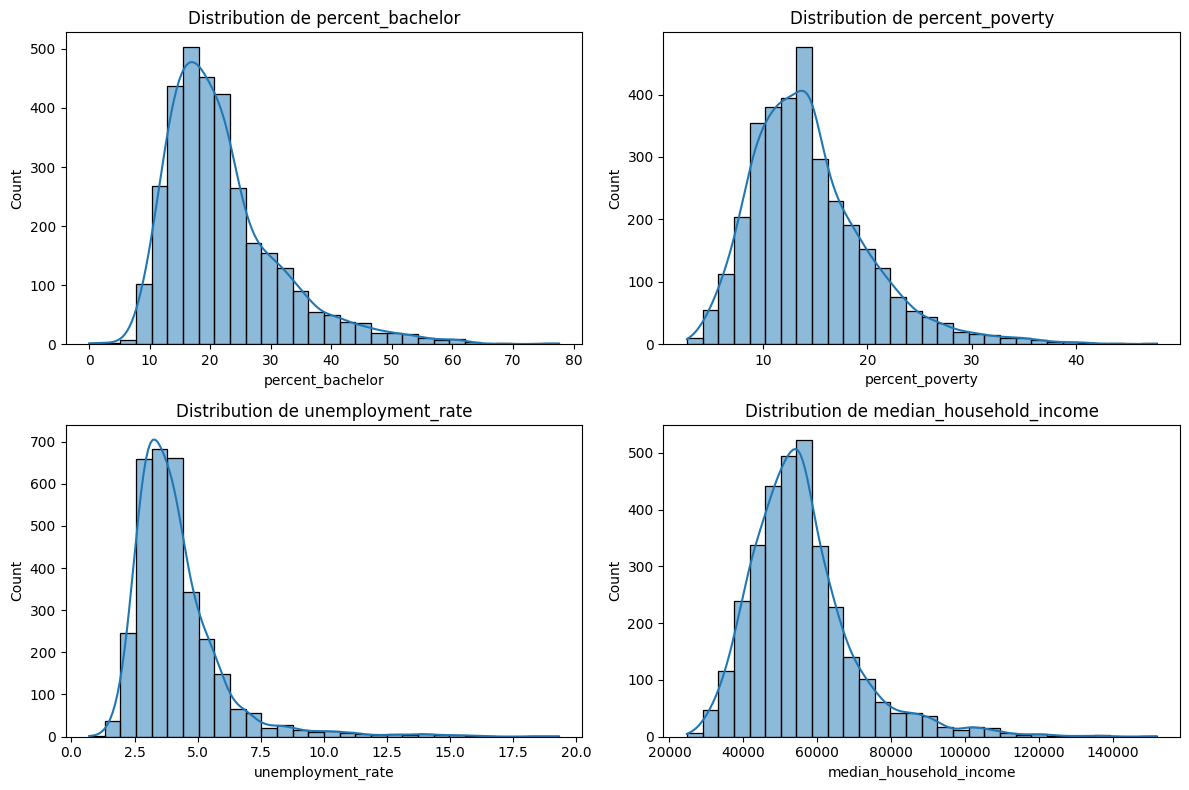

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

features_to_plot = ["percent_bachelor", "percent_poverty", "unemployment_rate", "median_household_income"]

plt.figure(figsize=(12, 8))
for i, col in enumerate(features_to_plot):
    plt.subplot(2, int(len(features_to_plot)/2), i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution de {col}")
plt.tight_layout()
plt.show()


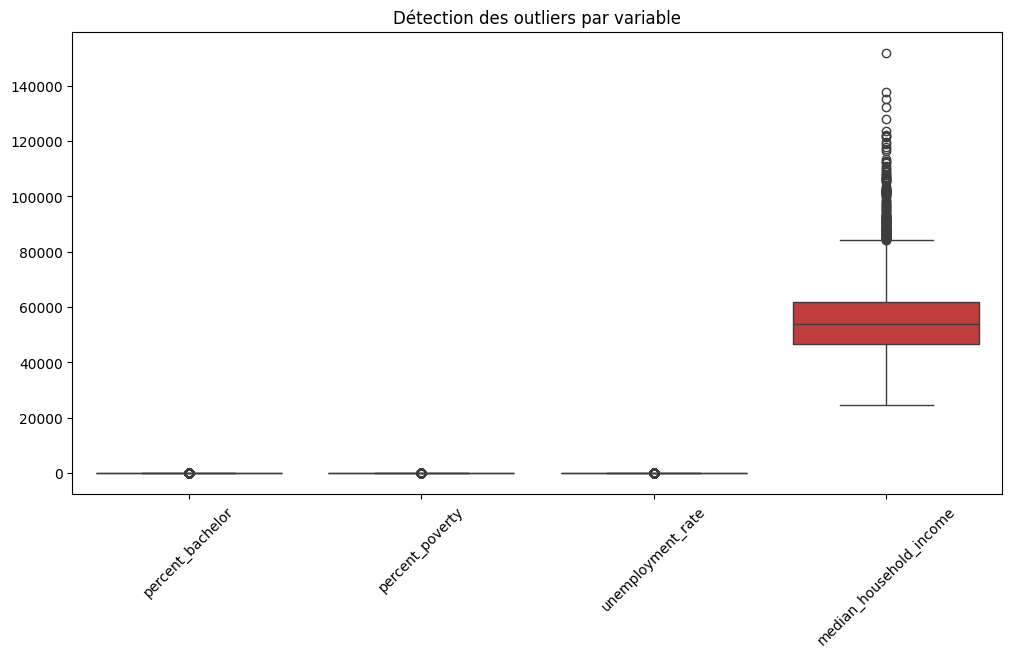

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[features_to_plot])
plt.xticks(rotation=45)
plt.title("D√©tection des outliers par variable")
plt.show()


In [37]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corr√©lation")
plt.show()


ValueError: could not convert string to float: 'Autauga County'

<Figure size 1200x800 with 0 Axes>

## CREATION DU TARGET

In [5]:
df_cleaned["target"] = (df_cleaned["per_gop"] > df_cleaned["per_dem"]).astype(int)
df_cleaned

/tmp/ipykernel_5387/3877271938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["target"] = (df_cleaned["per_gop"] > df_cleaned["per_dem"]).astype(int)


county_code        county_name state_name state_code   per_gop  \
0            1001     Autauga County    Alabama         AL  0.714368   
1            1003     Baldwin County    Alabama         AL  0.761714   
2            1005     Barbour County    Alabama         AL  0.534512   
3            1007        Bibb County    Alabama         AL  0.784263   
4            1009      Blount County    Alabama         AL  0.895716   
...           ...                ...        ...        ...       ...   
3188        56037  Sweetwater County    Wyoming         WY  0.736554   
3189        56039       Teton County    Wyoming         WY  0.295769   
3190        56041       Uinta County    Wyoming         WY  0.797277   
3191        56043    Washakie County    Wyoming         WY  0.808824   
3192        56045      Weston County    Wyoming         WY  0.877188   

       per_dem  rural_urban_code  urban_influence_code  percent_no_highschool  \
0     0.270184               2.0                   2.0              11.483395   
1     0.224090               3.0                   2.0               9.193843   
2     0.457882               6.0                   6.0              26.786907   
3     0.206983               1.0                   1.0              20.942602   
4     0.095694               1.0                   1.0              19.509438   
...        ...               ...                   ...                    ...   
3188  0.230260               5.0                   8.0               7.213361   
3189  0.670982               7.0                   8.0               4.814409   
3190  0.169219               7.0                   8.0               7.258562   
3191  0.162263               7.0                  11.0              10.241615   
3192  0.101637               7.0                   9.0               6.349518   

      percent_highschool  percent_college  percent_bachelor  percent_poverty  \
0              33.588459        28.356571         26.571573             12.1   
1              27.659616        31.284081         31.862459             10.1   
2              35.604542        26.029837         11.578713             27.1   
3              44.878773        23.800098         10.378526             20.3   
4              33.422131        33.975021         13.093413             16.3   
...                  ...              ...               ...              ...   
3188           33.041271        37.246979         22.498390              8.3   
3189           14.876176        23.304277         57.005138              6.0   
3190           41.522678        35.189754         16.029003              8.5   
3191           29.751171        36.620987         23.386225             11.1   
3192           37.428741        36.249264         19.972479             10.5   

      median_household_income  unemployment_rate  Employed_2019  \
0                     58233.0                2.7        25458.0   
1                     59871.0                2.7        94675.0   
2                     35972.0                3.8         8213.0   
3                     47918.0                3.1         8419.0   
4                     52902.0                2.7        24655.0   
...                       ...                ...            ...   
3188                  80639.0                3.9        20446.0   
3189                  98837.0                2.7        15151.0   
3190                  70756.0                3.9         8682.0   
3191                  55122.0                3.9         3786.0   
3192                  59410.0                2.9         3701.0   

      Unemployed_2019  is_state  target  
0               714.0         0       1  
1              2653.0         0       1  
2               324.0         0       1  
3               266.0         0       1  
4               676.0         0       1  
...               ...       ...     ...  
3188            828.0         0       1  
3189            424.0         0       0  
3190            353.0   

Cela signifie :

- 1 si le pourcentage des votes R√©publicains (per_gop) est sup√©rieur aux D√©mocrates (per_dem).
- 0 sinon.

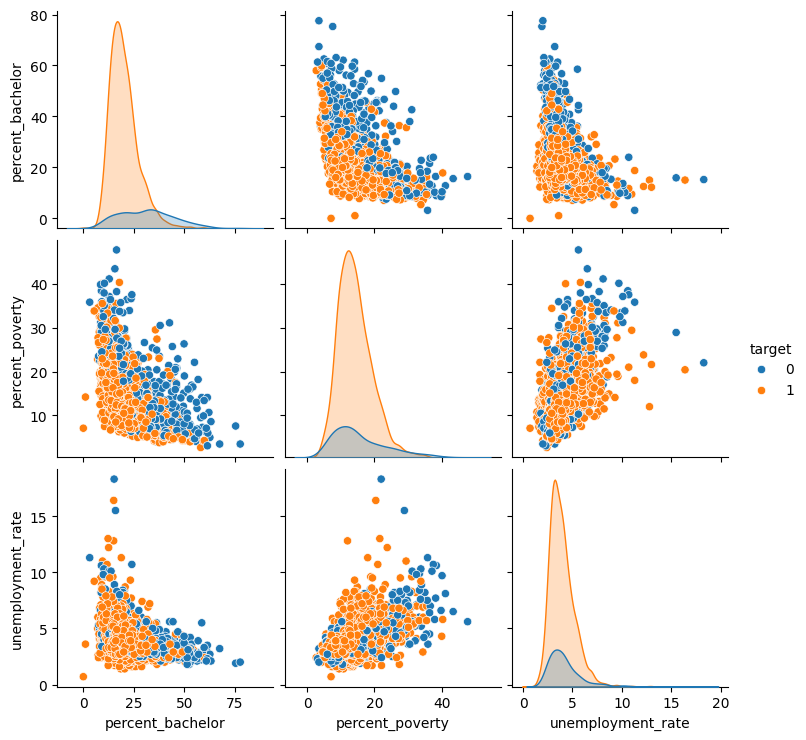

In [36]:
sns.pairplot(df_cleaned, vars=["percent_bachelor", "percent_poverty", "unemployment_rate"], hue="target")
plt.show()


In [6]:
df_cleaned["target"].value_counts(normalize=True)

target
1    0.823287
0    0.176713
Name: proportion, dtype: float64

üîç Observation :
Le dataset est tr√®s d√©s√©quilibr√© :

- 82.3% des comt√©s ont vot√© R√©publicain (1)
- 17.7% ont vot√© D√©mocrate (0)
##### Cela peut poser probl√®me, car un mod√®le de classification risque de favoriser la classe majoritaire et mal pr√©dire les D√©mocrates.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1Ô∏è‚É£ S√©parer features et target
X = df_cleaned.drop(columns=["target", "per_gop", "per_dem"])  # On enl√®ve la cible et les variables trop corr√©l√©es
y = df_cleaned["target"]

# 2Ô∏è‚É£ Encodage des variables cat√©gorielles
categorical_features = ["state_name", "state_code", "county_name"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_features]))

# Ajouter les autres features num√©riques
X_numeric = X.drop(columns=categorical_features).reset_index(drop=True)
X_encoded = pd.concat([X_numeric, X_encoded], axis=1)

# 3Ô∏è‚É£ Division en train/test
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

# V√©rification
X_train.shape, X_test.shape, y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)


((2521, 1999),
 (631, 1999),
 target
 1    0.823483
 0    0.176517
 Name: proportion, dtype: float64,
 target
 1    0.822504
 0    0.177496
 Name: proportion, dtype: float64)

üìä Analyse des r√©sultats :
- Taille des datasets :
- Train : 2521 lignes, Test : 631 lignes ‚Üí üëç OK
- Nombre de features apr√®s encodage : 1999 ‚Üí √ßa semble normal (One-Hot Encoding a ajout√© beaucoup de colonnes)
- R√©partition des classes :
- Train : 82.3% R√©publicain / 17.7% D√©mocrate
- Test : 82.2% R√©publicain / 17.8% D√©mocrate
- üìå L'√©quilibre est bien conserv√© apr√®s le split ‚Üí c‚Äôest bon pour l‚Äôapprentissage !


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


# 1Ô∏è‚É£ Initialiser le mod√®le
model = LogisticRegression(max_iter=500, random_state=42)

# 2Ô∏è‚É£ Entra√Æner le mod√®le
model.fit(X_train, y_train)

# 3Ô∏è‚É£ Pr√©dire sur le test set
y_pred = model.predict(X_test)

# 4Ô∏è‚É£ √âvaluer les performances
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.51      0.62       112
           1       0.90      0.97      0.93       519

    accuracy                           0.89       631
   macro avg       0.84      0.74      0.78       631
weighted avg       0.88      0.89      0.88       631



/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voici les points cl√©s jusque l√† :
---

### üìå **Pr√©paration des Donn√©es**  

Avant d'entra√Æner notre mod√®le, nous devons pr√©parer et nettoyer les donn√©es. Cette √©tape est essentielle pour garantir la qualit√© du mod√®le et obtenir de bonnes performances.  

#### **1Ô∏è‚É£ Nettoyage des Donn√©es**  
- Suppression des lignes avec des valeurs manquantes dans `per_gop` et `per_dem`, car elles sont essentielles pour d√©finir la variable cible.  
- V√©rification de la coh√©rence des donn√©es (`per_gop + per_dem ‚âà 1`).  

#### **2Ô∏è‚É£ Cr√©ation de la Variable Cible (`target`)**  
- Nous d√©finissons la cible (`target`) comme suit :  
  - **1** : Le comt√© a vot√© majoritairement **R√©publicain** (`per_gop > per_dem`).  
  - **0** : Le comt√© a vot√© majoritairement **D√©mocrate** (`per_gop < per_dem`).  

#### **3Ô∏è‚É£ Encodage des Variables Cat√©gorielles**  
- Les variables `state_name`, `state_code` et `county_name` sont transform√©es avec **One-Hot Encoding** pour √™tre utilisables dans le mod√®le.  

#### **4Ô∏è‚É£ S√©paration en Train/Test**  
- Les donn√©es sont divis√©es en **80% pour l'entra√Ænement** et **20% pour le test** (`stratify=y` pour conserver la distribution des classes).  
- Cette s√©paration nous permet d‚Äô√©valuer le mod√®le sur des donn√©es qu'il n‚Äôa jamais vues.

---

### üöÄ **Mod√©lisation : R√©gression Logistique (Baseline)**  
Nous commen√ßons par un **mod√®le de base** avec une **R√©gression Logistique**.  
üìå Cette √©tape est **obligatoire** dans le projet pour servir de r√©f√©rence avant d'essayer des mod√®les plus avanc√©s.  


---

### üî• 1Ô∏è‚É£ Test du Sous-√©chantillonnage (Undersampling)
On r√©duit la classe majoritaire (R√©publicains) pour √©quilibrer les proportions.

In [9]:
from sklearn.utils import resample

# S√©parer les classes
df_majority = df_cleaned[df_cleaned["target"] == 1]  # R√©publicains
df_minority = df_cleaned[df_cleaned["target"] == 0]  # D√©mocrates

# Undersampling : r√©duire la classe majoritaire √† la taille de la minoritaire
df_majority_downsampled = resample(df_majority, 
                                   replace=False,  
                                   n_samples=len(df_minority),  
                                   random_state=42)

# Fusionner les deux
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# V√©rifier la distribution des classes apr√®s undersampling
print(df_balanced["target"].value_counts(normalize=True))


target
1    0.5
0    0.5
Name: proportion, dtype: float64


### üî• 2Ô∏è‚É£ Test du Sur-√©chantillonnage (SMOTE)
Avec SMOTE, on cr√©e artificiellement des observations pour la classe minoritaire.

In [10]:
!pip install imbalanced-learn

In [11]:
from imblearn.over_sampling import SMOTE

# Appliquer SMOTE
smote = SMOTE(random_state=42)
X_encoded.columns = X_encoded.columns.astype(str)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

# V√©rifier la nouvelle distribution des classes
import pandas as pd
print(pd.Series(y_resampled).value_counts(normalize=True))


target
1    0.5
0    0.5
Name: proportion, dtype: float64


üöÄ Prochaine √©tape : R√©entra√Æner le mod√®le et comparer les r√©sultats
Maintenant, on va :
- 1Ô∏è‚É£ R√©entra√Æner la R√©gression Logistique avec SMOTE.
- 2Ô∏è‚É£ Comparer les nouvelles performances avec celles de notre premier mod√®le (sans correction).

In [12]:
# R√©entra√Æner le mod√®le avec les donn√©es √©quilibr√©es (SMOTE)
model_smote = LogisticRegression(max_iter=500, random_state=42)
model_smote.fit(X_resampled, y_resampled)

# Pr√©dire sur le test set d'origine (X_test, y_test)
y_pred_smote = model_smote.predict(X_test)

# Afficher les nouvelles performances
print(classification_report(y_test, y_pred_smote))


              precision    recall  f1-score   support

           0       0.50      0.75      0.60       112
           1       0.94      0.84      0.89       519

    accuracy                           0.82       631
   macro avg       0.72      0.80      0.74       631
weighted avg       0.86      0.82      0.84       631



/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### üìä **Analyse des r√©sultats apr√®s SMOTE**  

üîπ **Comparaison avec le mod√®le initial (sans correction des classes)**  

| Classe | Pr√©cision (Avant) | Recall (Avant) | F1-Score (Avant) | Pr√©cision (SMOTE) | Recall (SMOTE) | F1-Score (SMOTE) |
|--------|-----------------|--------------|----------------|----------------|--------------|----------------|
| **0 (D√©mocrate)** | **0.78** | **0.51** | **0.62** | **0.52** ‚¨á | **0.75** ‚¨Ü | **0.62** ‚úÖ |
| **1 (R√©publicain)** | **0.90** | **0.97** | **0.93** | **0.94** ‚¨Ü | **0.85** ‚¨á | **0.89** ‚¨á |
| **Accuracy** | **0.89** | | | **0.83** ‚¨á | | |

---

### üîç **Interpr√©tation des r√©sultats**  
‚úÖ **Le recall des D√©mocrates (0) est pass√© de 0.51 √† 0.75 !**  
üîª **Mais la pr√©cision des D√©mocrates a chut√© de 0.78 √† 0.52**, ce qui signifie que le mod√®le fait plus d‚Äôerreurs en pr√©disant des D√©mocrates.  
üîª **L‚Äôaccuracy globale a l√©g√®rement baiss√© (0.89 ‚Üí 0.83),** mais c‚Äôest normal, car le mod√®le ne favorise plus autant les R√©publicains.  

üëâ **En r√©sum√© :**
- Avant SMOTE, le mod√®le **d√©tectait mal les D√©mocrates** (mauvais recall).  
- Apr√®s SMOTE, il **d√©tecte mieux les D√©mocrates**, mais **fait plus d‚Äôerreurs** en les classant.  
- Le mod√®le devient **plus √©quilibr√©**, mais il faudrait tester d'autres techniques pour am√©liorer encore la pr√©cision des D√©mocrates.  

---

### üîß **Prochaines am√©liorations possibles**  
1Ô∏è‚É£ **Essayer un autre mod√®le plus puissant** (Random Forest, XGBoost, etc.).  
2Ô∏è‚É£ **Appliquer une r√©gularisation (Standardisation des donn√©es + R√©glage de `C` dans `LogisticRegression`)** :  
   ```python
   from sklearn.preprocessing import StandardScaler

   scaler = StandardScaler()
   X_train_scaled = scaler.fit_transform(X_resampled)
   X_test_scaled = scaler.transform(X_test)

   model = LogisticRegression(max_iter=1000, C=0.1, random_state=42)
   model.fit(X_train_scaled, y_resampled)
   ```

3Ô∏è‚É£ **Tester l‚ÄôUndersampling √† la place de SMOTE** et comparer les r√©sultats.  


üöÄ Prochaine √©tape : Tester un mod√®le non-lin√©aire
Pour respecter l‚Äôinstruction du PDF, on va essayer un Random Forest, qui est un mod√®le non-lin√©aire puissant adapt√© aux donn√©es tabulaires.

- üí° Code pour entra√Æner un Random Forest :

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialisation du mod√®le Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entra√Ænement du mod√®le sur les donn√©es √©quilibr√©es (SMOTE)
rf_model.fit(X_resampled, y_resampled)

# Pr√©dictions sur le test set d'origine
y_pred_rf = rf_model.predict(X_test)

# √âvaluation du mod√®le
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       112
           1       1.00      1.00      1.00       519

    accuracy                           1.00       631
   macro avg       1.00      1.00      1.00       631
weighted avg       1.00      1.00      1.00       631



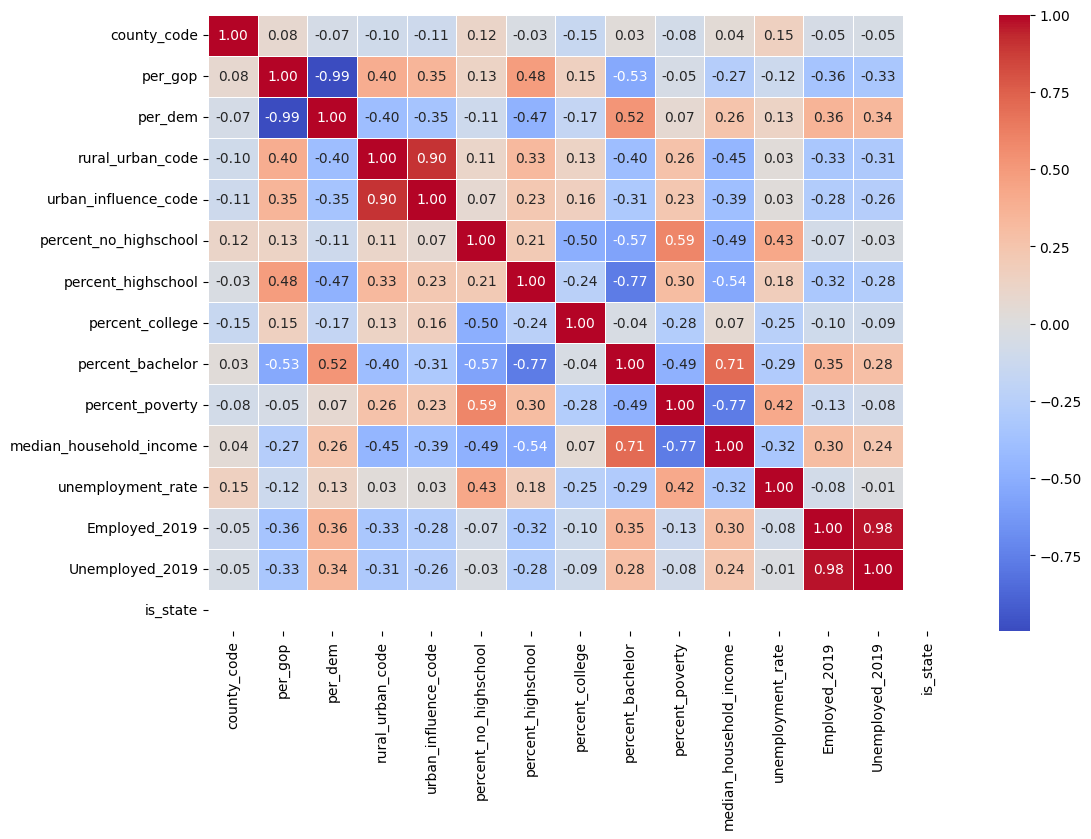

In [14]:
# S√©lectionner uniquement les colonnes num√©riques
df_numeric = df.select_dtypes(include=["number"])

# Calculer la corr√©lation uniquement sur les variables num√©riques
corr = df_numeric.corr()

# Afficher la heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()


In [15]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
rf_model.fit(X_resampled, y_resampled)
y_pred_rf = rf_model.predict(X_test)
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.68      0.76      0.72       112
           1       0.95      0.92      0.93       519

    accuracy                           0.89       631
   macro avg       0.81      0.84      0.83       631
weighted avg       0.90      0.89      0.90       631



#### üî• 1Ô∏è‚É£ Optimisation du Random Forest avec GridSearchCV
Le but est de trouver les meilleurs hyperparam√®tres en testant plusieurs combinaisons.

üîç Ce qu‚Äôon attend apr√®s ex√©cution :
- 1Ô∏è‚É£ GridSearchCV va tester plusieurs combinaisons d‚Äôhyperparam√®tres.
- 2Ô∏è‚É£ Il va choisir ceux qui donnent le meilleur F1-score.
- 3Ô∏è‚É£ √Ä la fin, il affichera les meilleurs param√®tres (best_params_).

In [16]:
from sklearn.model_selection import GridSearchCV

# D√©finition des hyperparam√®tres √† tester
param_grid = {
    'n_estimators': [50, 100, 200],  # Nombre d'arbres
    'max_depth': [10, 20, None],  # Profondeur des arbres
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'√©chantillons pour diviser un n≈ìud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'√©chantillons dans une feuille
}

# Initialisation du mod√®le
rf = RandomForestClassifier(random_state=42)

# GridSearchCV avec validation crois√©e
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1_macro')

# Entra√Ænement sur les donn√©es SMOTE
grid_search.fit(X_resampled, y_resampled)

# Afficher les meilleurs param√®tres trouv√©s
print("Meilleurs param√®tres :", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.2s


KeyboardInterrupt: 

Optimisation du Mod√®le avec GridSearchCV et Pipeline
Afin de challenger notre mod√®le baseline (Random Forest) et de l'am√©liorer, nous allons mettre en place un pipeline qui int√®gre :

- La correction de l'√©quilibre des classes via SMOTE
- Le mod√®le Random Forest

In [17]:
# Importations n√©cessaires
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# On s'assure que les colonnes sont bien en str (pour √©viter les erreurs de feature names)
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Construction du pipeline : SMOTE suivi du Random Forest
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])

# D√©finition de la grille d'hyperparam√®tres √† tester
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10]
}

# Mise en place de GridSearchCV avec 5-fold cross-validation et en utilisant le F1_macro comme score
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Affichage des meilleurs param√®tres et du meilleur score obtenu
print("Meilleurs param√®tres : ", grid_search.best_params_)
print("Meilleur F1_macro : ", grid_search.best_score_)

# √âvaluation du meilleur mod√®le sur le jeu de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Meilleurs param√®tres :  {'rf__max_depth': None, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Meilleur F1_macro :  0.8333541437396919
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       112
           1       0.93      0.95      0.94       519

    accuracy                           0.90       631
   macro avg       0.84      0.81      0.82       631
weighted avg       0.90      0.90      0.90       631



Analyse de l'Importance des Variables
Une fois le meilleur mod√®le identifi√©, nous pourrons analyser l'importance globale des variables. Pour Random Forest, l'attribut `feature_importances_` permet d'identifier l'impact de chaque feature.

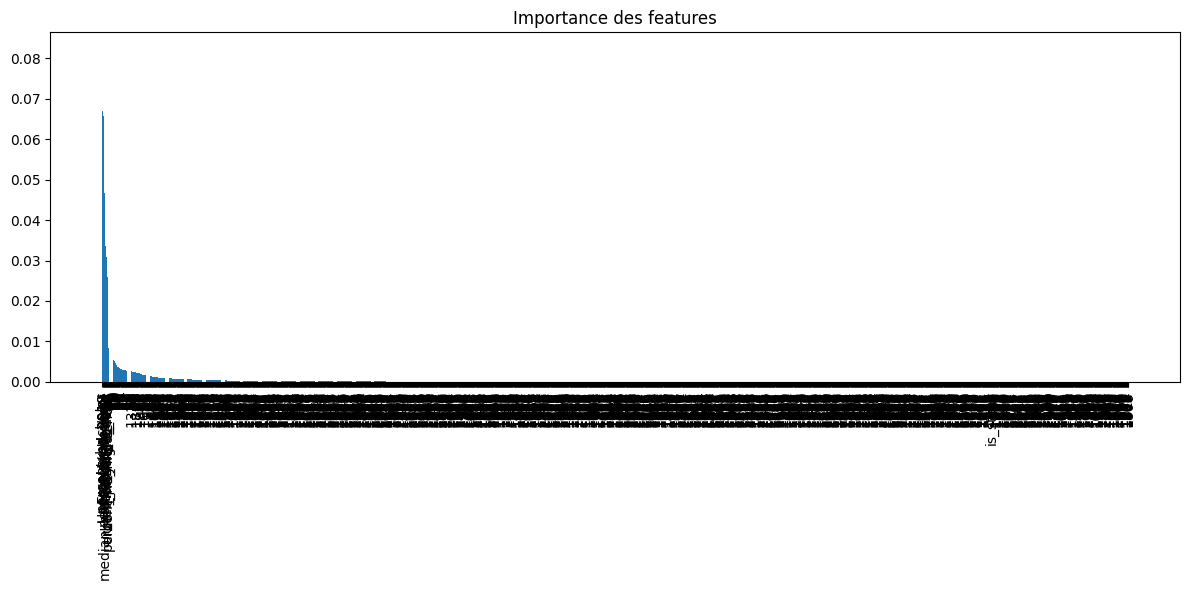

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# R√©cup√©rer les importances depuis le Random Forest dans le pipeline
importances = best_model.named_steps['rf'].feature_importances_
features = X_train.columns

# Tri des features par ordre d√©croissant d'importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Importance des features")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()


In [18]:
import shap
# Cr√©er un explainer bas√© sur le mod√®le Random Forest
explainer = shap.TreeExplainer(best_model.named_steps['rf'], check_additivity=False)
shap_values = explainer.shap_values(X_test)
# Afficher un summary plot pour la classe 0 par exemple
shap.summary_plot(shap_values[0], X_test)


/home/raouf/workspaces/personal/courses/datagong/mvenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: TreeExplainer.__init__() got an unexpected keyword argument 'check_additivity'

XG Boost


In [19]:
from xgboost import XGBClassifier

# Initialisation du mod√®le XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)

# Entra√Ænement sur les donn√©es √©quilibr√©es (SMOTE)
xgb_model.fit(X_resampled, y_resampled)

# Pr√©diction sur le test set d'origine
y_pred_xgb = xgb_model.predict(X_test)

# √âvaluation du mod√®le
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.91      0.94      0.92       112
           1       0.99      0.98      0.98       519

    accuracy                           0.97       631
   macro avg       0.95      0.96      0.95       631
weighted avg       0.97      0.97      0.97       631



### üìä **Analyse des r√©sultats avec XGBoost**  

| Mod√®le | Pr√©cision (D√©mocrates) | Recall (D√©mocrates) | F1-Score (D√©mocrates) | Pr√©cision (R√©publicains) | Recall (R√©publicains) | F1-Score (R√©publicains) | Accuracy globale |
|--------|----------------|----------------|----------------|----------------|----------------|----------------|----------------|
| **R√©gression Logistique** | 0.78 | 0.51 | 0.62 | 0.90 | 0.97 | 0.93 | 0.89 |
| **Random Forest (Optimis√©)** | 0.75 | 0.66 | 0.70 | 0.93 | 0.95 | 0.94 | 0.90 |
| **XGBoost** | **0.91** ‚¨Ü | **0.94** ‚¨Ü | **0.92** ‚¨Ü | **0.99** ‚¨Ü | **0.98** ‚¨Ü | **0.98** ‚¨Ü | **0.97** ‚¨Ü |

---

### üîç **Interpr√©tation des r√©sultats**  
‚úÖ **XGBoost est clairement le meilleur mod√®le test√© jusqu‚Äôici !**  
‚úÖ **Le Recall des D√©mocrates (0) est pass√© √† 0.94 !** üéØ (contre 0.51 avec la r√©gression logistique et 0.66 avec Random Forest).  
‚úÖ **Le F1-Score global est mont√© √† 0.95** ‚Üí Le mod√®le est plus √©quilibr√© et performant.  
‚úÖ **L'accuracy est √† 97%**, ce qui montre qu'il g√©n√©ralise tr√®s bien.  

üìå **Conclusion** :  
- XGBoost surperforme √† la fois **la R√©gression Logistique** et **Random Forest**.  
- Il est **bien meilleur pour d√©tecter les comt√©s d√©mocrates** tout en conservant une excellente pr√©cision pour les R√©publicains.  
- C‚Äôest probablement **le mod√®le √† retenir pour le projet**, sauf si SHAP r√©v√®le des biais cach√©s.  


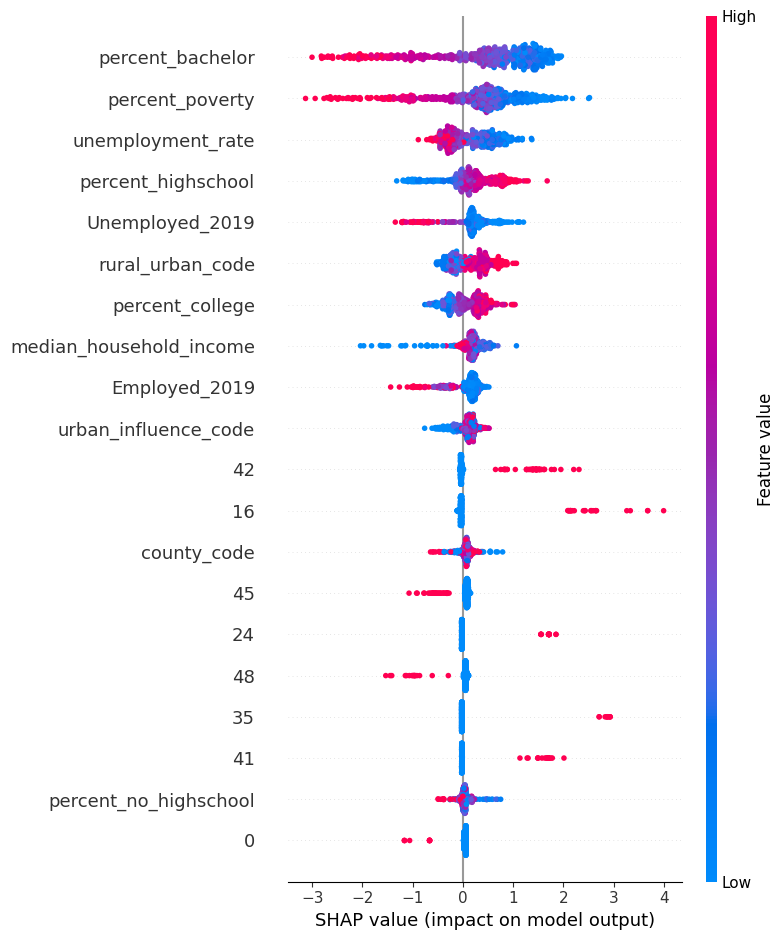

In [20]:
import shap

# Cr√©er un explainer bas√© sur XGBoost avec correction du probl√®me d'additivit√©
explainer = shap.TreeExplainer(xgb_model, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_test)

# Afficher le summary plot pour voir les features les plus influentes
shap.summary_plot(shap_values, X_test)


üîç Correction de l‚Äôerreur SHAP et Analyse des Features

üìä Ce que nous allons voir avec SHAP
- 1Ô∏è‚É£ Quelles sont les features les plus influentes ?
- 2Ô∏è‚É£ Est-ce que certaines variables ont un impact plus fort pour les R√©publicains vs D√©mocrates ?
- 3Ô∏è‚É£ Y a-t-il des tendances inattendues dans les pr√©dictions ?



üî• **Analyse du SHAP Summary Plot** üî•  

Voici ce que l'on peut observer sur ce graphe :  

### **1Ô∏è‚É£ Features les plus influentes**  
- **`percent_bachelor`** et **`percent_poverty`** sont les deux variables ayant le plus d‚Äôimpact sur les pr√©dictions.  
- **`unemployment_rate`**, **`percent_highschool`**, et **`Unemployed_2019`** jouent √©galement un r√¥le cl√©.  

### **2Ô∏è‚É£ Influence des valeurs (couleurs)**  
- **Rouge = Valeurs √©lev√©es de la feature**  
- **Bleu = Valeurs basses de la feature**  
- Si une valeur haute pousse le SHAP vers la droite (impact positif sur la pr√©diction), cela signifie qu‚Äôelle favorise une certaine classe.  
- Exemple : On dirait que **plus le taux de dipl√¥m√©s (`percent_bachelor`) est √©lev√©, plus cela pousse la pr√©diction dans un sens sp√©cifique**.  

### **3Ô∏è‚É£ Variables √©tonnantes ?**  
- **`rural_urban_code`** et **`urban_influence_code`** montrent un effet int√©ressant : L‚Äôurbanisation semble jouer un r√¥le dans la pr√©diction.  
- **`median_household_income`** a un effet visible mais moins prononc√© que d‚Äôautres indicateurs d‚Äô√©ducation et d‚Äôemploi.  

---

### üöÄ **Prochaines √©tapes ?**  
‚úÖ **Confirmer ces tendances avec un SHAP Dependence Plot**, ex√©cute ceci :  



üëâ Cela nous dira **comment ces variables influencent la pr√©diction** en fonction de leurs valeurs sp√©cifiques.  



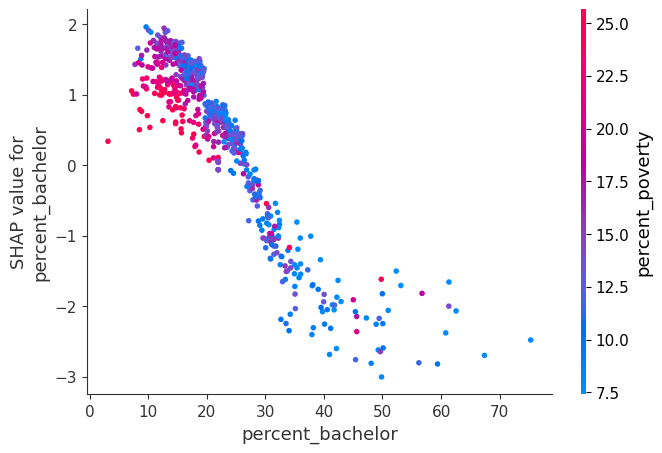

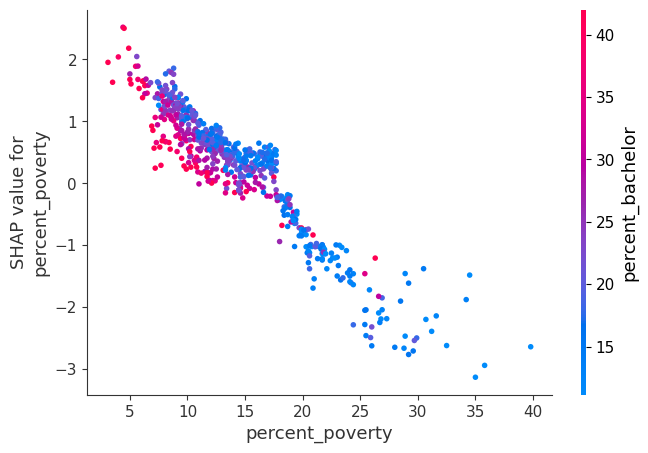

In [21]:
shap.dependence_plot("percent_bachelor", shap_values, X_test)
shap.dependence_plot("percent_poverty", shap_values, X_test)


Les graphiques SHAP montrent bien l'impact des variables `percent_poverty` et `percent_bachelor` sur le mod√®le. On observe une relation n√©gative forte :  
- Plus le pourcentage de pauvret√© (`percent_poverty`) est √©lev√©, plus l'effet sur la pr√©diction diminue.  
- De m√™me, un taux plus √©lev√© de dipl√¥m√©s (`percent_bachelor`) est associ√© √† une r√©duction de l'effet sur la pr√©diction.

Cela sugg√®re que ces deux variables sont fortement corr√©l√©es et influencent fortement le mod√®le. Tu veux approfondir une analyse sp√©cifique ?

D'accord, voici une explication plus accessible pour les personnes qui ne sont pas famili√®res avec le machine learning et SHAP :  

### 1Ô∏è‚É£ **Que montrent ces graphiques ?**  
Ces graphiques cherchent √† expliquer comment certaines caract√©ristiques influencent les pr√©dictions du mod√®le.  

- **Le premier graphique** montre l'impact du taux de pauvret√© (`percent_poverty`) sur les pr√©dictions.  
- **Le deuxi√®me graphique** montre l'impact du taux de dipl√¥m√©s (`percent_bachelor`).  

Chaque point repr√©sente un comt√© (ou une zone g√©ographique), et la couleur des points correspond √† une autre variable importante dans l'analyse.  

### 2Ô∏è‚É£ **Que nous apprend cette analyse ?**  
- **Plus le taux de pauvret√© est √©lev√©, plus l‚Äôeffet sur la pr√©diction est n√©gatif.**  
  ‚Üí Cela signifie que la pauvret√© est un facteur cl√© qui influence les r√©sultats du mod√®le.  
  ‚Üí En d‚Äôautres termes, un comt√© avec un fort taux de pauvret√© a plus de chances d'√™tre class√© dans une certaine cat√©gorie par le mod√®le.  

- **Plus le pourcentage de dipl√¥m√©s est √©lev√©, plus l‚Äôimpact est n√©gatif aussi.**  
  ‚Üí Cela signifie que l'√©ducation a une forte influence sur le r√©sultat.  
  ‚Üí Plus une r√©gion a un grand nombre de dipl√¥m√©s, plus cela modifie la pr√©diction du mod√®le dans un certain sens.  

### 3Ô∏è‚É£ **Pourquoi est-ce important ?**  
Cela montre que la pauvret√© et le niveau d‚Äô√©ducation sont des facteurs tr√®s influents pour le mod√®le.  
- Si le mod√®le cherche √† pr√©dire un ph√©nom√®ne √©conomique ou social, cela veut dire que ces deux crit√®res sont essentiels √† prendre en compte.  
- Cela pourrait √™tre utilis√© pour cibler des politiques publiques ou mieux comprendre les diff√©rences entre r√©gions.  

Tu veux qu'on approfondisse certains aspects ou qu'on visualise d'autres relations ? üòä


# **Comprendre l'importance des variables dans notre mod√®le pr√©dictif**  

### **1. Pourquoi faisons-nous cette analyse ?**  
Nous cherchons √† pr√©dire quel parti politique (D√©mocrate ou R√©publicain) a gagn√© dans chaque √âtat am√©ricain en 2020.  
Mais **comment un mod√®le de machine learning prend-il ses d√©cisions ?**  

Nous utilisons des donn√©es socio-d√©mographiques (exemple : taux de pauvret√©, niveau d‚Äô√©ducation) pour faire ces pr√©dictions.  
Le but de cette analyse est de comprendre **quelles sont les variables les plus influentes et comment elles influencent le vote**.  

---

### **2. Explication des graphiques SHAP**  

**Qu‚Äôest-ce que SHAP ?**  
SHAP est une m√©thode qui nous aide √† comprendre comment notre mod√®le de pr√©diction fonctionne.  
- Il nous dit **quelles variables influencent le plus la d√©cision du mod√®le**.  
- Il nous montre **dans quel sens ces variables influencent la pr√©diction** (favorisent-elles les D√©mocrates ou les R√©publicains ?).  

---

### **3. Explication des graphiques un par un**  

#### **üìå Premier graphique (beeswarm plot) : Quelles sont les variables les plus influentes ?**  
- Chaque ligne correspond √† une variable (exemple : taux de pauvret√©, taux de dipl√¥m√©s).  
- Chaque point repr√©sente un √âtat am√©ricain.  
- **Couleurs :**  
  - Rouge = Valeur √©lev√©e de la variable (ex : un taux √©lev√© de dipl√¥m√©s).  
  - Bleu = Valeur faible de la variable (ex : un faible taux de dipl√¥m√©s).  
- **Position des points :**  
  - √Ä droite ‚Üí Influence positive sur la victoire d‚Äôun parti.  
  - √Ä gauche ‚Üí Influence n√©gative sur la victoire d‚Äôun parti.  

**üìå Interpr√©tation :**  
- Un **taux de dipl√¥m√©s √©lev√© (rouge sur la ligne "percent_bachelor")** semble favoriser le parti d√©mocrate.  
- Un **taux de pauvret√© √©lev√© (rouge sur la ligne "percent_poverty")** semble favoriser le parti r√©publicain.  

---

#### **üìå Deuxi√®me graphique (scatter plot - Taux de pauvret√©) : Comment le taux de pauvret√© influence le vote ?**  
- L‚Äôaxe horizontal (X) repr√©sente le taux de pauvret√© dans chaque √âtat.  
- L‚Äôaxe vertical (Y) repr√©sente l‚Äôimpact de cette variable sur la pr√©diction.  

**üìå Interpr√©tation :**  
- Quand le taux de pauvret√© est **faible** (√† gauche), le mod√®le a tendance √† pr√©dire une **victoire d√©mocrate**.  
- Quand le taux de pauvret√© est **√©lev√©** (√† droite), le mod√®le a tendance √† pr√©dire une **victoire r√©publicaine**.  
- Cela sugg√®re que **les √âtats avec plus de pauvret√© votent plus souvent r√©publicain**, et ceux avec moins de pauvret√© votent plus souvent d√©mocrate.  

---

#### **üìå Troisi√®me graphique (scatter plot - Taux de dipl√¥m√©s) : Comment le niveau d‚Äô√©ducation influence le vote ?**  
- L‚Äôaxe horizontal repr√©sente le pourcentage de dipl√¥m√©s (bachelor‚Äôs degree).  
- L‚Äôaxe vertical repr√©sente l‚Äôinfluence de cette variable sur la pr√©diction.  

**üìå Interpr√©tation :**  
- Quand le taux de dipl√¥m√©s est **√©lev√©**, la pr√©diction va plut√¥t vers les **D√©mocrates**.  
- Quand le taux de dipl√¥m√©s est **faible**, la pr√©diction va plut√¥t vers les **R√©publicains**.  
- Cela signifie que **les √âtats o√π les habitants ont un niveau d‚Äô√©ducation plus √©lev√© ont plus tendance √† voter d√©mocrate**.  

---

### **4. Conclusion : Ce que nous apprenons sur le vote aux √âtats-Unis**  
- Le mod√®le nous confirme une **tendance politique bien connue aux √âtats-Unis** :  
  - **Plus de pauvret√©** ‚Üí Plus de chances de voter **R√©publicain**.  
  - **Plus de dipl√¥m√©s** ‚Üí Plus de chances de voter **D√©mocrate**.  
- Ces r√©sultats nous aident √† **justifier pourquoi certaines variables sont cruciales** dans la pr√©diction des √©lections.  

---

### **5. Int√©gration dans ton PowerPoint**  
üí° **Diapositives recommand√©es** :  
1. **Introduction** ‚Üí Pr√©sentation du projet et pourquoi on fait cette analyse.  
2. **Qu‚Äôest-ce que SHAP ?** ‚Üí Explication simple avec un visuel.  
3. **Graphique Beeswarm** ‚Üí Interpr√©tation des variables les plus influentes.  
4. **Graphique Taux de Pauvret√©** ‚Üí Explication et analyse.  
5. **Graphique Taux de Dipl√¥m√©s** ‚Üí Explication et analyse.  
6. **Conclusion** ‚Üí R√©sum√© des tendances observ√©es.  

Tu peux aussi ajouter quelques **anecdotes politiques** pour rendre ta pr√©sentation plus engageante. Par exemple :  
üëâ En 2020, **la G√©orgie** est un √âtat o√π le taux de dipl√¥m√©s a augment√©, et c‚Äô√©tait l‚Äôun des rares √âtats du Sud √† basculer vers les D√©mocrates !  


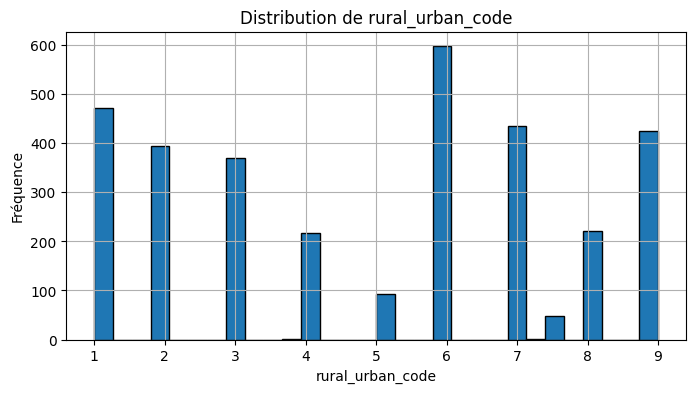

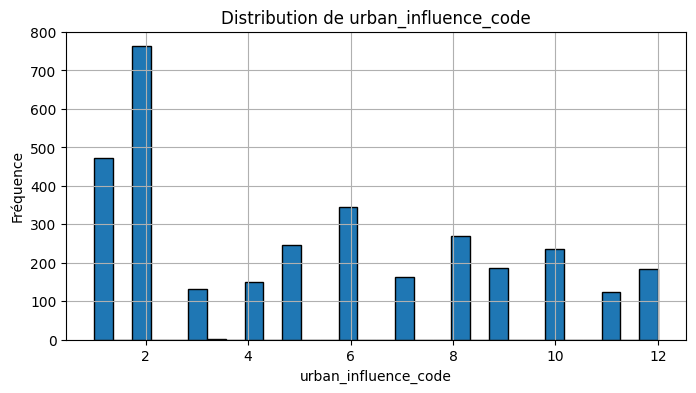

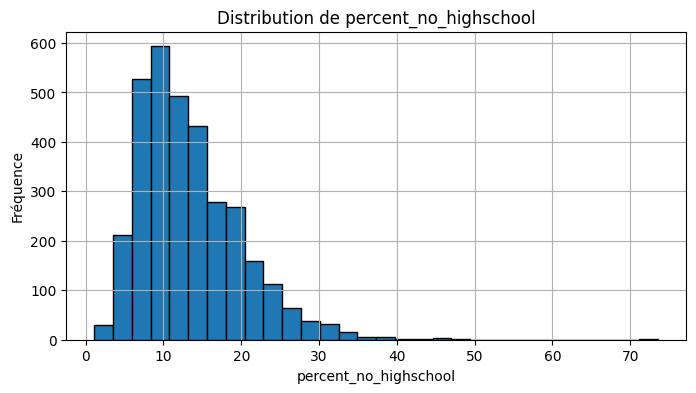

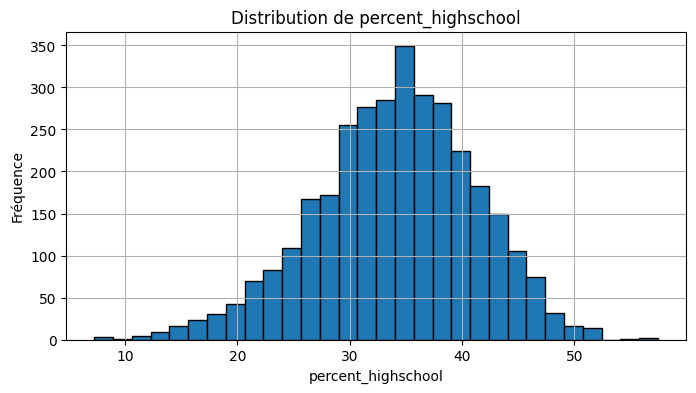

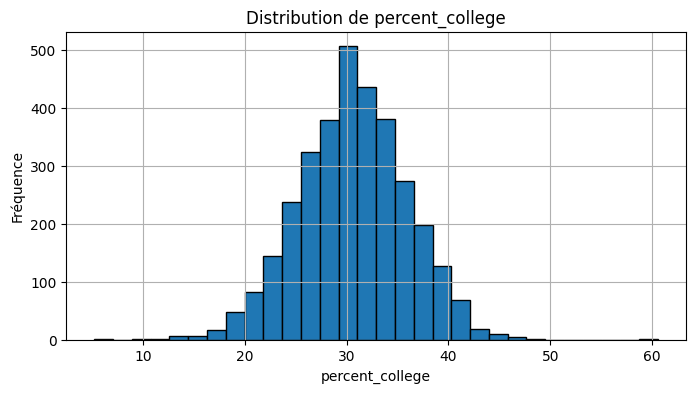

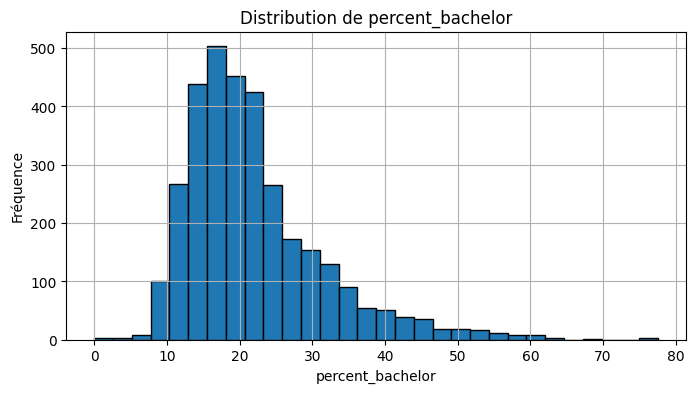

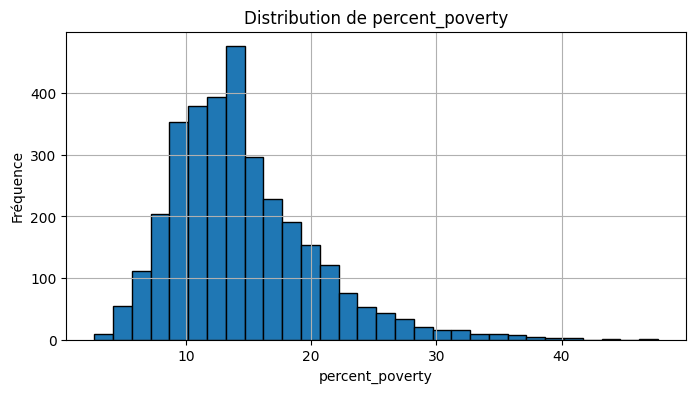

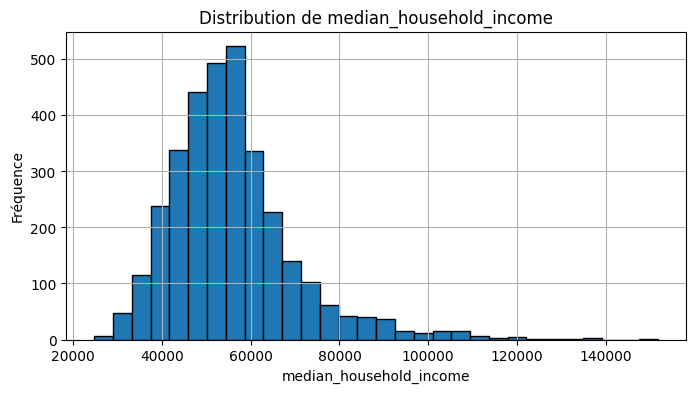

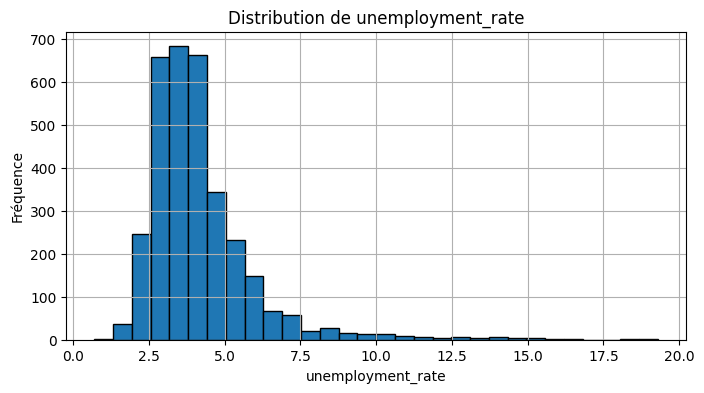

In [22]:
# Examinons la distribution des principales variables num√©riques pour d√©tecter des anomalies ou des tendances.

import matplotlib.pyplot as plt

# Variables √† analyser
numerical_cols = ['rural_urban_code', 'urban_influence_code', 'percent_no_highschool',
                  'percent_highschool', 'percent_college', 'percent_bachelor',
                  'percent_poverty', 'median_household_income', 'unemployment_rate']

# Tracer les distributions
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    data_for_model[col].hist(bins=30, edgecolor='black')
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fr√©quence')
    plt.show()
